In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [29]:
nascidos_vivos=pd.read_csv('b1abb33c4f.csv') 

In [30]:
nascidos_vidos=pd.DataFrame(nascidos_vivos)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [31]:
nascidos_vivos.loc[nascidos_vivos['APGAR5']<=3, 'ASFIXIA']= 'asfixia severa' #antes da vírgula filtra e depois a nova variável
nascidos_vivos.loc[(nascidos_vivos['APGAR5']>3) & (nascidos_vivos['APGAR5']<=5),
                   'ASFIXIA']= 'asfixia moderada'
nascidos_vivos.loc[(nascidos_vivos['APGAR5']>5) & (nascidos_vivos['APGAR5']<=7),
                   'ASFIXIA']= 'asfixia leve'
nascidos_vivos.loc[nascidos_vivos['APGAR5']>7, 'ASFIXIA']= 'normal'
nascidos_vivos['ASFIXIA'].value_counts()

normal              26463
asfixia leve          320
asfixia severa         74
asfixia moderada       68
Name: ASFIXIA, dtype: int64

<Axes: xlabel='ASFIXIA', ylabel='count'>

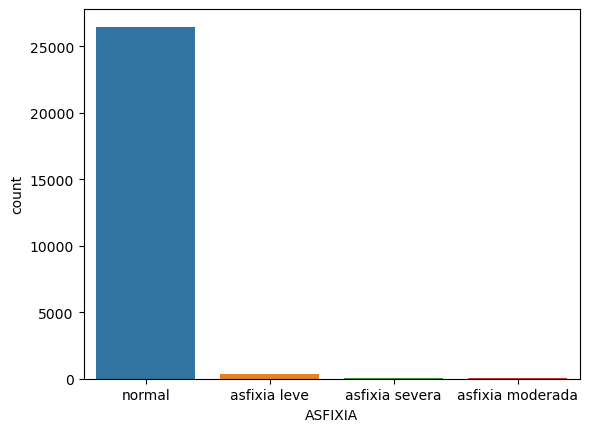

In [32]:
sns.countplot(x='ASFIXIA', data=nascidos_vivos)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

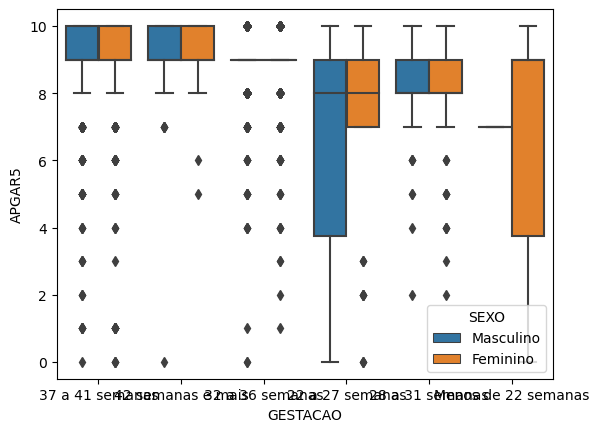

In [35]:
ax = sns.boxplot(data = nascidos_vivos, y="APGAR5", x="GESTACAO", orient="v", hue='SEXO')

In [11]:
nascidos_vivos['GESTACAO'].value_counts()

37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

O gráfico acima revela que quanto maior o tempo de gestação, menor é o risco do bebê sofrer com asfixia, se mantendo praticamente igual para o sexo feminino e masculino. De 28 a 31 semanas o risco de asfixia é maior para o sexo masculino enquanto que menos de 22 semanas o risco é maior para o sexo feminino. 

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [27]:
tabela_asfixia_gestacao=pd.crosstab(nascidos_vivos['GESTACAO'], nascidos_vivos['ASFIXIA'])
tabela_asfixia_gestacao

ASFIXIA,asfixia leve,asfixia moderada,asfixia severa,normal
GESTACAO,,,,
22 a 27 semanas,12,1,21,51
28 a 31 semanas,18,12,3,129
32 a 36 semanas,73,19,8,2134
37 a 41 semanas,196,28,33,22266
42 semanas e mais,6,1,1,690
Menos de 22 semanas,1,0,2,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [14]:
percent = pd.crosstab(
    index=nascidos_vivos['GESTACAO'], 
    columns=nascidos_vivos['ASFIXIA'], 
    normalize='index') * 100
percent

ASFIXIA,asfixia leve,asfixia moderada,asfixia severa,normal
GESTACAO,,,,
22 a 27 semanas,14.117647,1.176471,24.705882,60.000000
28 a 31 semanas,11.111111,7.407407,1.851852,79.629630
32 a 36 semanas,3.267681,0.850492,0.358102,95.523724
37 a 41 semanas,0.870222,0.124317,0.146517,98.858944
42 semanas e mais,0.859599,0.143266,0.143266,98.853868
Menos de 22 semanas,14.285714,0.000000,28.571429,57.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

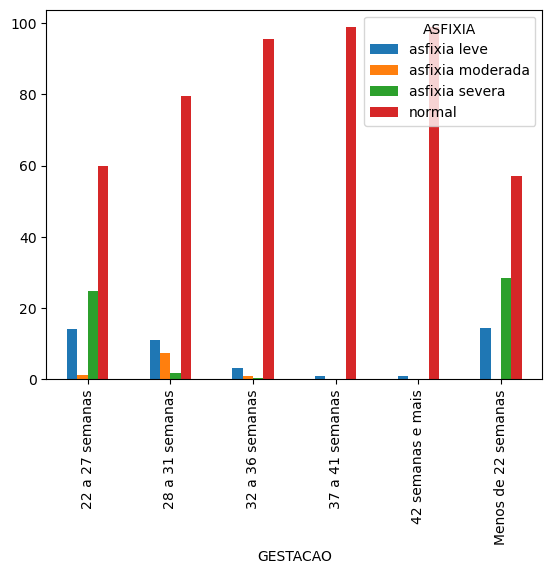

In [16]:
percent.plot(kind='bar')

O gráfico acima revela que quanto menor o tempo de gestação, maior é a incidencia de asfixia, considerando a leve, a moderada e a severa. Já a partir de 37 semanas, além de uma queda brusca nesses casos, só se mostra presente ainda a incidência, apesar de muito baixa, de asfixia leve, o que reafirma a classificação dos médicos. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

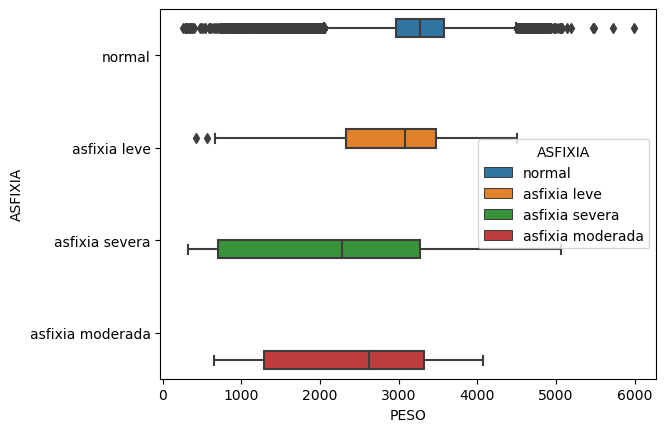

In [41]:
ax = sns.boxplot(data = nascidos_vivos, y="ASFIXIA", x="PESO", orient="h", hue='ASFIXIA')

Os bebês normais ou com asfixia leve tem sua média de peso entre 3 e 4kg. Enquanto que os bebês com asfixia moderada e severa apresentam sua média de peso entre 2 e 3kg, o que poderia implicar que recém nascidos com peso abaixo de 3kg tem maior chance de apresentar asfixia moderada ou severa. 